In [2]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import functions_hiwi as fct

In [3]:
main_dir = r'C:\Users\illic\Python\data_hiwi'

In [4]:
# set paths to specific data
WS100_rtu_path = os.path.join(main_dir, r'WS100_ready_to_use.csv')
WS300_rtu_path = os.path.join(main_dir, r'WS300_ready_to_use.csv')
Raine_rtu_path = os.path.join(main_dir, r'Raine_ready_to_use.csv')
L_pcp_rtu_path = os.path.join(main_dir, r'L_pcp_ready_to_use.csv')

In [5]:
# read data

# read data and convert to utc
WS100_rtu = pd.read_csv(WS100_rtu_path, sep=',', index_col=0) # , skiprows=1
WS100_rtu.index = pd.to_datetime(WS100_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

WS300_rtu = pd.read_csv(WS300_rtu_path, sep=',', index_col=0) # , skiprows=1
WS300_rtu.index = pd.to_datetime(WS300_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

Raine_rtu = pd.read_csv(Raine_rtu_path, sep=',', index_col=0) # , skiprows=1
Raine_rtu.index = pd.to_datetime(Raine_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

L_pcp_rtu = pd.read_csv(L_pcp_rtu_path, sep=',', index_col=0) # , skiprows=1
L_pcp_rtu.index = pd.to_datetime(L_pcp_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

In [6]:
# precipitation_type

# 0 = No precipitation
# 60 = Liquid precipitation, e.g. rain
# 70 = Solid precipitation, e.g. snow
# 40 = unspecified precipitation
# (WS401-UMB, WS601-UMB, external
# rain gauge)
# WS100-UMB only:
# 67 = freezing rain
# 69 = sleet
# 90 = hail

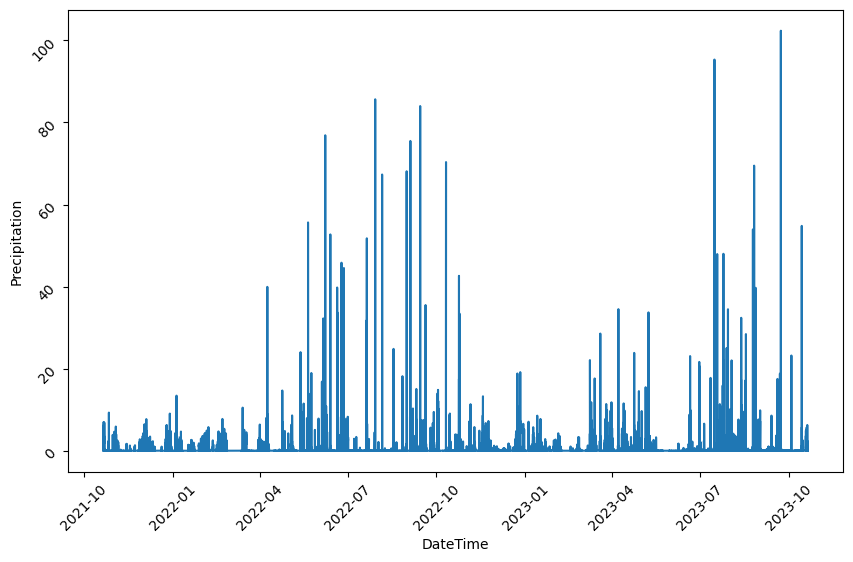

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(WS100_rtu.index, WS100_rtu['precipitation'], label='WS100')
# ax.set_title('Precipitation Over Time')
ax.set_xlabel('DateTime')
ax.set_ylabel('Precipitation')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()
plt.close()

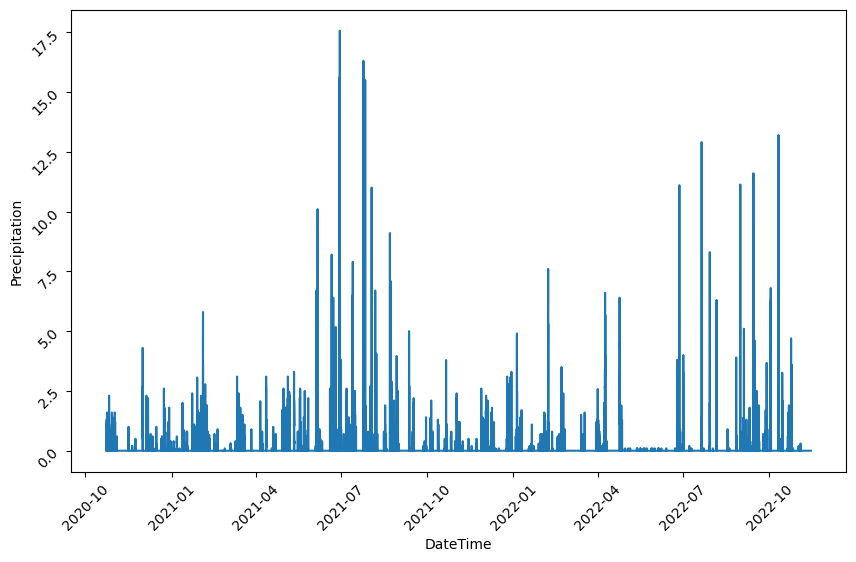

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(WS300_rtu.index, WS300_rtu['precipitation'], label='WS300')
# ax.set_title('Precipitation Over Time')
ax.set_xlabel('DateTime')
ax.set_ylabel('Precipitation')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()
plt.close()

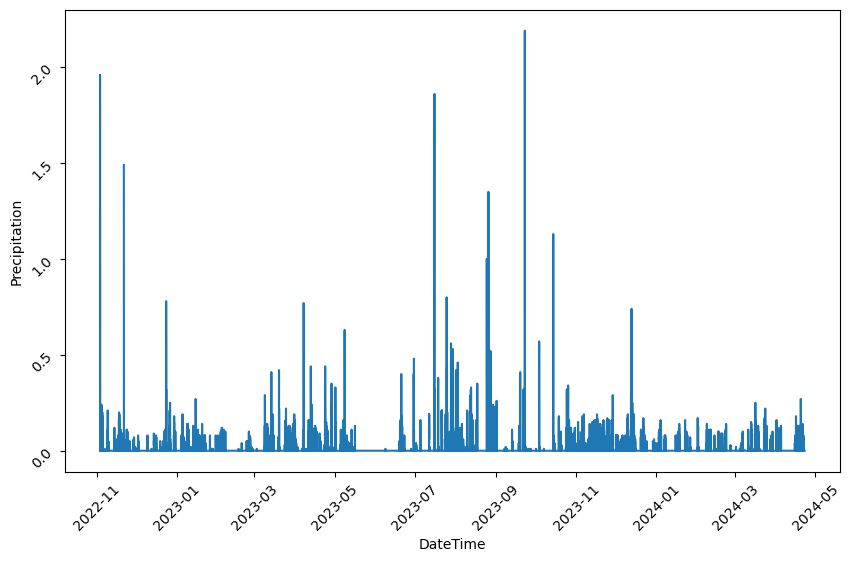

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(Raine_rtu.index, Raine_rtu['Niederschlagsmenge'], label='Raine')
# ax.set_title('Precipitation Over Time')
ax.set_xlabel('DateTime')
ax.set_ylabel('Precipitation')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.show()
plt.close()

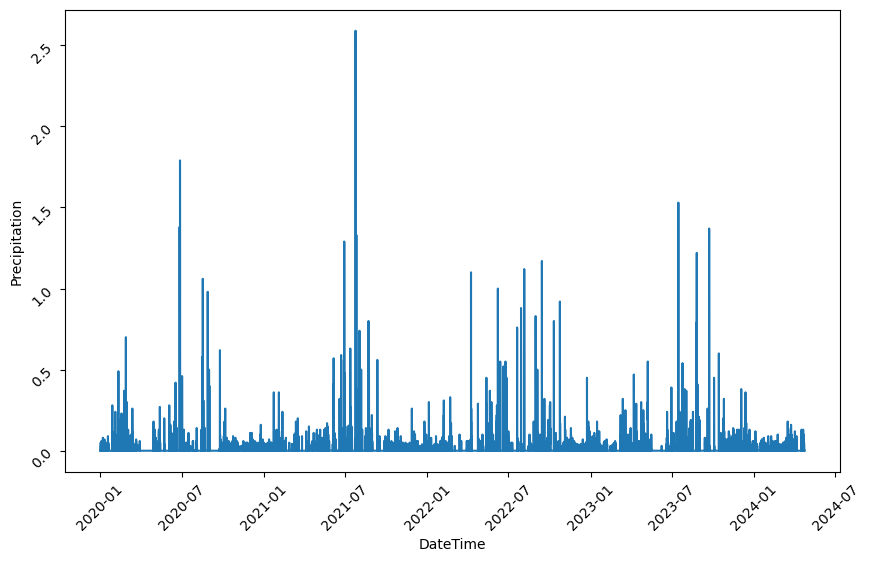

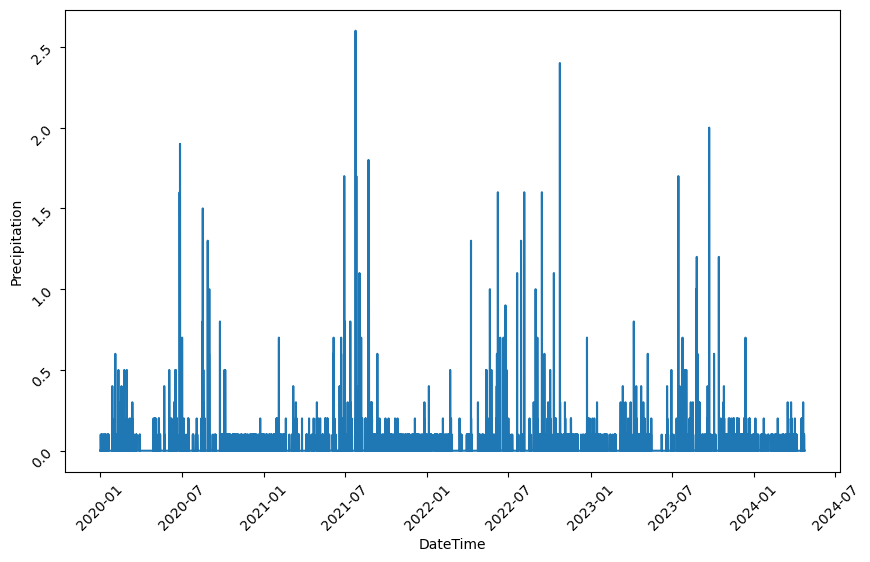

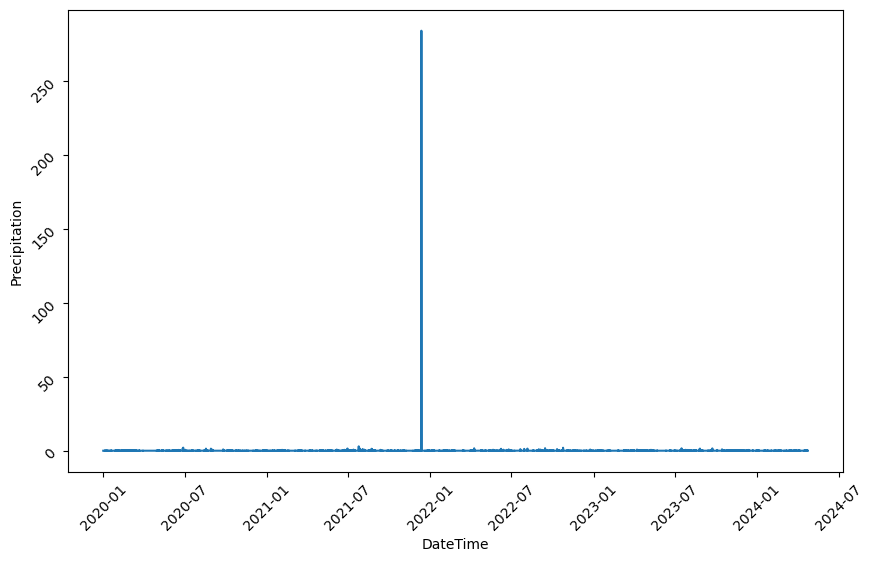

In [22]:
for column in L_pcp_rtu.columns:

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(L_pcp_rtu.index, L_pcp_rtu[column], label='L_pcp')
    # ax.set_title('Precipitation Over Time')
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Precipitation')

    plt.xticks(rotation=45)
    plt.yticks(rotation=45)

    plt.show()
    plt.close()